# How to handle missing catogerical values

## 1. Frequent catogery imputation
- Replace missing values with ferequent catogery variables(also called as mode-most repeating value)

In [19]:
import pandas as pd

In [25]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [30]:
# Now find number of missing values

df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [31]:
# we can also find mean 
# SalePrice feature has no missing value
# here BsmtQual,GarageType has less missing values 
# Now we are replacing those NAN values with corresponding frequent repeated value
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [40]:
# Now by using mode we can find most frequent occuring value of each feature
df.mode()

# But to know the count of 'most frequent occuring value' we use value_counts()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,TA,Gd,Attchd,140000


In [42]:
df.BsmtQual.value_counts()
# means by this we can see that TA is repeating for 649 times which is highest
# similarly we can find for remaining features

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [49]:
# if we want catogery name 
df.BsmtQual.mode()[0]

'TA'

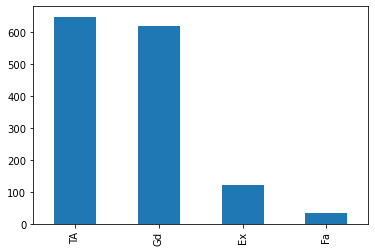

In [47]:
# we can also see in bar plot format
# using pictorial representation aslo we can find most frequently occuring value

df['BsmtQual'].value_counts().plot.bar()

In [51]:
# Now lets replace NAN values with frequent values

def impute_nan(df,variable):
    most_frequent_catogery=df.BsmtQual.mode()[0]
    df[variable].fillna(most_frequent_catogery,inplace=True)   

In [52]:
for variable in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,variable)

In [54]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages
- Easy To implement
- Fater way to implement 
### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

## 2.Adding a variable to capture NAN
- capturing the importance of NAN value using new feature
- creating a new variable/feature instead of NAN value's variable/feature
- then replace NAN with most frequent value

In [55]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [56]:
import numpy as np

In [57]:
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [60]:
# Now replace NAN values in BsmtQual with most frequent catogery
most_frequent=df['BsmtQual'].mode()[0]
most_frequent

'TA'

In [61]:
df['BsmtQual'].fillna(most_frequent,inplace=True)

In [62]:
# Now repeat the same process for another feature
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
most_frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(most_frequent,inplace=True)

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Sub part of Adding a variable to capture NAN
### Suppose we have more frequent catogeries,we just replace NAN with a new category
### where ever NAN is there we are considering that as new catogery

In [64]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [65]:
def impute_nan(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),"Missing",df[variable]) #here "Missing is a new catogery"

In [66]:
for variable in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,variable)

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [68]:
# instead of new features we can replace in existing feature also
# else now we can drop existing features

df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [69]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# 3.One hot encoding
- using getdummies(df) we create new features and then dropping 1 column
- if there are n catogeires in a feature then there are n-1 new features

In [72]:
df=pd.read_csv('Titanic_train.csv',usecols=['Sex'])

In [73]:
pd.get_dummies(df)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [74]:
# Now we can remove 1 column 
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [75]:
# Now lets see the example if there are more than 2 catogeries
df=pd.read_csv('Titanic_train.csv',usecols=['Embarked'])
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [77]:
# now we can remove 1 column
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Disadvantage:
- If there are 100 catogeires then we get 99 new features which creates more complex
- in order to avoid we follow below format if there are more catogeires

# 4.One hot encoding with many categories in a feature

In [78]:
df=pd.read_csv('mercedes.csv')
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df=pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [82]:
# Now lets see how many catogeries are there
df.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [83]:
# Now lets see catogeries along with count
df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
l      16
aw     16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
ab      1
g       1
Name: X0, dtype: int64

In [84]:
# now lets see count of unique catogeries
len(df.X0.unique())

47

In [95]:
# similar way find for all features
for i in df.columns:
    print(len(df[i].unique()))  

47
27
44
7
4
29
12


In [96]:
# consider 1 feature
# from h catodgery we can see that there are very less repeating values
df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
l      16
aw     16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
ab      1
g       1
Name: X0, dtype: int64

In [137]:
# considering top most frequent values
df.X0.value_counts(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [138]:
# Inorder to replace NAN catogerical values we need catogeries(that is index)
list_10=df.X0.value_counts(ascending=False).head(10).index
list_10=list(list_10) #converting into list
list_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [141]:
# Now just think an example of sex_female and sex_male 
# we used only one col sex_male and values are 1,0 (if male=1 else=0)
# similarly here we should implement for the above 9 catogeries
import numpy as np
for catogeries in list_10:
    df[catogeries]=np.where(df['X0']==catogeries,1,0)

In [142]:
df

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [144]:
df[list_10]

,z,ak,y,ay,t,x,o,f,n,w
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0
4206,0,1,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0


In [145]:
# display along with X0 feature
list_10.append('X0')

In [146]:
df[list_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al


# 5.Probability ratio encoding